In [127]:
import matplotlib.pyplot as plt
import time

In [128]:
from common_functions import *

In [146]:
C = np.load('encodec_transformed_data/C.npy')
Cv = np.load('encodec_transformed_data/Cv.npy')
y = np.load('encodec_transformed_data/yC.npy')
yv = np.load('encodec_transformed_data/yCv.npy')
# C = np.reshape(C,(-1,75,20))
# Cv = np.reshape(Cv,(-1,75,20))
# C = np.transpose(C,axes=(0,3,2,1))
# Cv = np.transpose(Cv,axes=(0,3,2,1))

In [147]:
np.shape(C)

(6400, 2, 75, 10)

In [149]:
model = models.Sequential([
    layers.Input(shape=(2,75,10)),
    lq.layers.QuantConv2D(32, (1,3), activation='relu',input_quantizer="ste_sign"),
    layers.MaxPooling2D(pool_size=(1,2)),
    layers.BatchNormalization(),
    lq.layers.QuantConv2D(64, (1,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(1,2)),
    layers.Flatten(),
    lq.layers.QuantDense(128, activation='relu'),
    lq.layers.QuantDense(8),
])
lq.models.summary(model)

+sequential_30 stats-------------------------------------------------------------------+
| Layer                   Input prec.          Outputs  # 32-bit   Memory  32-bit MACs |
|                               (bit)                        x 1     (kB)              |
+--------------------------------------------------------------------------------------+
| quant_conv2d_60                   1  (-1, 2, 73, 32)       992     3.88       140160 |
| max_pooling2d_44                  -  (-1, 2, 36, 32)         0        0            0 |
| batch_normalization_19            -  (-1, 2, 36, 32)        64     0.25            0 |
| quant_conv2d_61                   -  (-1, 2, 34, 64)      6208    24.25       417792 |
| max_pooling2d_45                  -  (-1, 2, 17, 64)         0        0            0 |
| flatten_30                        -       (-1, 2176)         0        0            0 |
| quant_dense_75                    -        (-1, 128)    278656  1088.50       278528 |
| quant_dense_76     

In [150]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [151]:
train_acc = [];
test_acc = [];
elapsed_time = [];

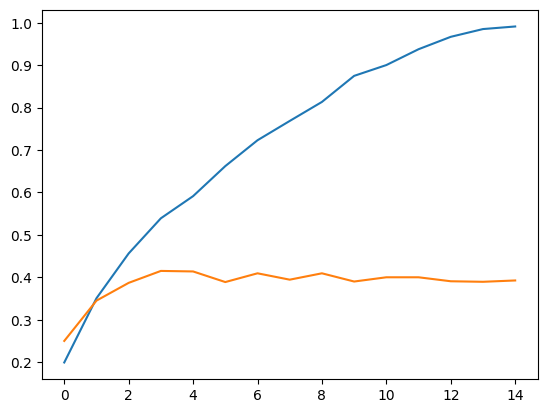

In [152]:
for i_iter in range(15):
    t = time.process_time()
    train_history = model.fit(x=C, y=y, epochs=1, batch_size=64);
    elapsed_time.append(time.process_time()-t)
    _, test_acc_i = model.evaluate(x=Cv, y=yv)
    train_acc.append(train_history.history['accuracy'][0])
    test_acc.append(test_acc_i)
    display.clear_output()
plt.plot(np.vstack(train_acc))
plt.plot(np.vstack(test_acc))

In [153]:
print(np.median(elapsed_time), "seconds/iteration")
print(np.median(test_acc[-5:]), "test accuracy")

0.8007183970003098 seconds/iteration
0.39250001311302185 test accuracy
